<a href="https://colab.research.google.com/github/anithash89/Campaigns_Data_Analysis_Cleansing/blob/main/Campaigns_Data_Cleansing_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all required libraries




In [123]:
import pandas as pd #importing pandas module to do data analysis
import numpy as np # To do mathematical calculations and Null values identification
import matplotlib.pyplot as plt #FOR GRAPH REPRESENTATION



# Create Sample Raw data 1
#Create Raw data (Sample test data) which contains StoreID and Campaign information for each week and corresponding Sales amount

In [124]:
    
raw_data1 = {'StoreId': ['1', '2', '3', '4', '5'],
                'StoreSize': ['medium', np.NAN, 'small', 'medium', 'large'],
                'Campaigns': [1, 2, 3, 1, 2],
                'Week': [1, 2, 3, 4, 1],
                'SalesAmount': [25, 25, 49, 62, 70]}

df1 = pd.DataFrame(raw_data1, columns = ['StoreId', 'StoreSize', 'Campaigns',
                                           'Week', 'SalesAmount'])
print(df1)

  StoreId StoreSize  Campaigns  Week  SalesAmount
0       1    medium          1     1           25
1       2       NaN          2     2           25
2       3     small          3     3           49
3       4    medium          1     4           62
4       5     large          2     1           70


## Creating Sample data 2 similar to Sample data 1

In [96]:
raw_data2 = {'StoreId': ['1', '2', '30', '4', '50'],
                'StoreSize': ['medium', 'small', 'small', 'medium', 'small'],
                'Campaigns': [1, 3,np.NaN, 1, 1],
                'Week': [1, 2, 3, 4, 1],
                'SalesAmount': [25, 45, 67, 65, 72]}

df2 = pd.DataFrame(raw_data2, columns = ['StoreId', 'StoreSize', 'Campaigns',
                                           'Week', 'SalesAmount'])

df2

,StoreId,StoreSize,Campaigns,Week,SalesAmount
0,1,medium,1.0,1,25
1,2,small,3.0,2,45
2,30,small,NaN,3,67
3,4,medium,1.0,4,65
4,50,small,1.0,1,72


# **Merge or combine  2 data sets**

In [97]:
Merge_df = [df1,df2]
Merge_result =pd.concat(Merge_df)
Merge_result

,StoreId,StoreSize,Campaigns,Week,SalesAmount
0,1,medium,1.0,1,25
1,2,NaN,2.0,2,25
2,3,small,3.0,3,49
3,4,medium,1.0,4,62
4,5,large,2.0,1,70
0,1,medium,1.0,1,25
1,2,small,3.0,2,45
2,30,small,NaN,3,67
3,4,medium,1.0,4,65
4,50,small,1.0,1,72


# **# Remove the duplicate columns based on each StoreId,Week, and SalesAmount**

In [111]:
Dup_result=Merge_result.drop_duplicates(subset=['StoreId','Week','SalesAmount'])
Dup_result


,StoreId,StoreSize,Campaigns,Week,SalesAmount
0,1,medium,1.0,1,25
1,2,NaN,2.0,2,25
2,3,small,3.0,3,49
3,4,medium,1.0,4,62
4,5,large,2.0,1,70
1,2,small,3.0,2,45
2,30,small,NaN,3,67
3,4,medium,1.0,4,65
4,50,small,1.0,1,72


# **# Check for Missing values or Null values **
# **There are 2 missing values which represents True**

In [112]:
missing=Dup_result.isnull()
missing

,StoreId,StoreSize,Campaigns,Week,SalesAmount
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False


# **## Remove the Missing values and clean the data from the result of duplicates**

# **# The RESULT is CLEAN data **

In [113]:
cleanse=Dup_result.dropna()
cleanse

,StoreId,StoreSize,Campaigns,Week,SalesAmount
0,1,medium,1.0,1,25
2,3,small,3.0,3,49
3,4,medium,1.0,4,62
4,5,large,2.0,1,70
1,2,small,3.0,2,45
3,4,medium,1.0,4,65
4,50,small,1.0,1,72


# **Calculate Sum of salesamount for each store and for each week**

In [120]:
SumOfSales = cleanse.groupby(['StoreId','Week','Campaigns']).sum('SalesAmount')
SumOfSales

,,,SalesAmount
StoreId,Week,Campaigns,
1,1,1.0,25
2,2,3.0,45
3,3,3.0,49
4,4,1.0,127
5,1,2.0,70
50,1,1.0,72


## **Final Result: The Store Id 4 in the week of 4 has got increased Sales amount**

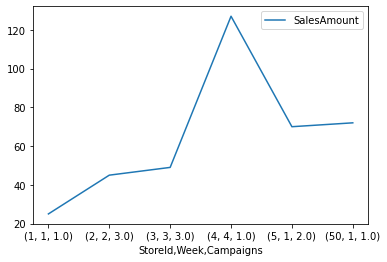

In [122]:
SumOfSales.plot()